In [1]:
import math
import time
import numpy as np
import pandas as pd
import datetime as dt

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn import linear_model
from sklearn.metrics import accuracy_score

from matplotlib import pyplot as plt
from matplotlib import style
style.use('seaborn')
from IPython.display import display

import warnings
warnings.filterwarnings("ignore")

In [2]:
pd.options.display.max_rows = 10
pd.options.display.float_format = "{:.2f}".format

In [3]:
my_eq_df = pd.read_csv('eq_database_place.csv')
my_eq_df.describe()

,Latitude,Longitude,Depth,Depth Error,Depth Seismic Stations,Magnitude,Magnitude Error,Magnitude Seismic Stations,Azimuthal Gap,Horizontal Distance,Horizontal Error,Root Mean Square
count,23412.00,23412.00,23412.00,4461.00,7097.00,23412.00,327.00,2564.00,7299.00,1604.00,1156.00,17352.00
mean,1.68,39.64,70.77,4.99,275.36,5.88,0.07,48.94,44.16,3.99,7.66,1.02
std,30.11,125.51,122.65,4.88,162.14,0.42,0.05,62.94,32.14,5.38,10.43,0.19
min,-77.08,-180.00,-1.10,0.00,0.00,5.50,0.00,0.00,0.00,0.00,0.09,0.00
25%,-18.65,-76.35,14.52,1.80,146.00,5.60,0.05,10.00,24.10,0.97,5.30,0.90
50%,-3.57,103.98,33.00,3.50,255.00,5.70,0.06,28.00,36.00,2.32,6.70,1.00
75%,26.19,145.03,54.00,6.30,384.00,6.00,0.08,66.00,54.00,4.72,8.10,1.13
max,86.00,180.00,700.00,91.30,934.00,9.10,0.41,821.00,360.00,37.87,99.00,3.44


## Convert string values into numbers

In [4]:
def label_integer_encoder(my_df, series_name):
    """
    This function is encoding values of a series
    Parameter
    ---------
    * `my_df`: Pandas dataframe
    * `series_name`: Pandas series name to encode
    Returns : a encoded array
    """
    arr_name = np.array(list(my_df[str(series_name)]))
    label_arr_encoder = LabelEncoder()
    integer_arr_encoded = label_arr_encoder.fit_transform(arr_name)
    
    return integer_arr_encoded

In [5]:
dummy_eq = my_eq_df.copy()

# country wise data alone
dummy_df = dummy_eq[dummy_eq['Place'].str.contains('ID')]
# dummy_df = dummy_df.reindex(np.random.permutation(dummy_df.index))

display(dummy_df.head())
print(len(dummy_df))

,Date,Time,Latitude,Longitude,Type,Depth,Depth Error,Depth Seismic Stations,Magnitude,Magnitude Type,...,Azimuthal Gap,Horizontal Distance,Horizontal Error,Root Mean Square,ID,Source,Location Source,Magnitude Source,Status,Place
1,01/04/1965,11:29:49,1.86,127.35,Earthquake,80.00,nan,nan,5.80,MW,...,nan,nan,nan,nan,ISCGEM860737,ISCGEM,ISCGEM,ISCGEM,Automatic,"Ngidihopitonu, ID"
10,01/17/1965,20:57:41,-6.81,108.99,Earthquake,227.90,nan,nan,5.90,MW,...,nan,nan,nan,nan,ISCGEM861155,ISCGEM,ISCGEM,ISCGEM,Automatic,"Bulakamba, ID"
11,01/24/1965,00:11:17,-2.61,125.95,Earthquake,20.00,nan,nan,8.20,MW,...,nan,nan,nan,nan,ISCGEM861299,ISCGEM,ISCGEM,ISCGEM,Automatic,"Umaoya, ID"
54,02/15/1965,10:43:29,3.03,125.95,Earthquake,100.00,nan,nan,5.90,MW,...,nan,nan,nan,nan,ISCGEMSUP860207,ISCGEMSUP,ISCGEM,ISCGEM,Automatic,"Enunawira, ID"
93,03/19/1965,16:20:53,-1.89,119.84,Earthquake,40.00,nan,nan,6.00,MW,...,nan,nan,nan,nan,ISCGEM858722,ISCGEM,ISCGEM,ISCGEM,Automatic,"Babana, ID"


2241


## Actual integer conversion

In [6]:
dummy_df['Type'] = label_integer_encoder(dummy_df, 'Type')
dummy_df['Magnitude Type'] = label_integer_encoder(dummy_df, 'Magnitude Type')
dummy_df['Place'] = label_integer_encoder(dummy_df, 'Place')
dummy_df['Status'] = label_integer_encoder(dummy_df, 'Status')
dummy_df['Depth Error'] = label_integer_encoder(dummy_df, 'Depth Error')
dummy_df['Depth Seismic Stations'] = label_integer_encoder(dummy_df, 'Depth Seismic Stations')
dummy_df['Magnitude Error'] = label_integer_encoder(dummy_df, 'Magnitude Error')
dummy_df['Magnitude Seismic Stations'] = label_integer_encoder(dummy_df, 'Magnitude Seismic Stations')
dummy_df['Azimuthal Gap'] = label_integer_encoder(dummy_df, 'Azimuthal Gap')
dummy_df['Horizontal Distance'] = label_integer_encoder(dummy_df, 'Horizontal Distance')
dummy_df['Horizontal Error'] = label_integer_encoder(dummy_df, 'Horizontal Error')
dummy_df['Root Mean Square'] = label_integer_encoder(dummy_df, 'Root Mean Square')

## Plot of `dummy_df[Type]` to show major reasons

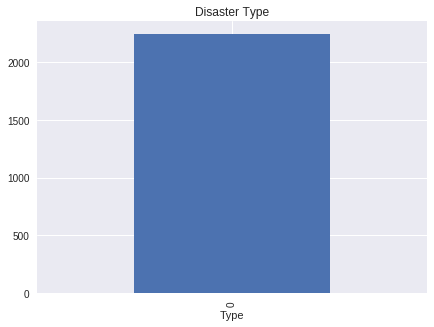

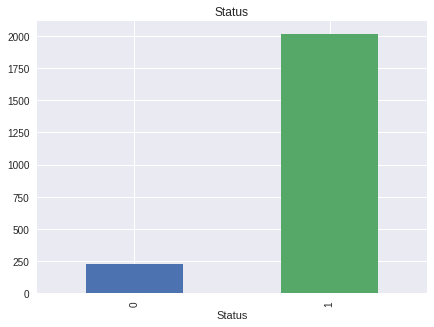

In [7]:
dummy_df.groupby('Type').size().plot(
    figsize=(7, 5), kind='bar', title="Disaster Type")
plt.show()

# 0 --> Earthquake
# 1 --> Explosion
# 2 --> Nuclear Explosion

# plot of dummy_df[status]

dummy_df.groupby('Status').size().plot(
    figsize=(7, 5), kind='bar', title="Status")
plt.show()

# 0 --> Automatic
# 1 --> Reviewed

## Remove Unwanted

In [8]:
dummy_df = dummy_df.drop(['ID', 'Source', 'Location Source', 'Magnitude Source'], axis=1)
display(dummy_df.head())

,Date,Time,Latitude,Longitude,Type,Depth,Depth Error,Depth Seismic Stations,Magnitude,Magnitude Type,Magnitude Error,Magnitude Seismic Stations,Azimuthal Gap,Horizontal Distance,Horizontal Error,Root Mean Square,Status,Place
1,01/04/1965,11:29:49,1.86,127.35,0,80.00,879,551,5.80,2,78,529,766,1119,1076,660,0,160
10,01/17/1965,20:57:41,-6.81,108.99,0,227.90,1229,1103,5.90,2,1485,1416,1135,1488,1445,277,0,43
11,01/24/1965,00:11:17,-2.61,125.95,0,20.00,1228,1104,8.20,2,1486,1415,1136,1489,1446,276,0,296
54,02/15/1965,10:43:29,3.03,125.95,0,100.00,1227,1105,5.90,2,1487,1414,1137,1490,1447,275,0,71
93,03/19/1965,16:20:53,-1.89,119.84,0,40.00,1226,1106,6.00,2,1488,1413,1138,1491,1448,274,0,11


## Time object into numerical values

In [9]:
timestamp = []
for d, t in zip(dummy_df['Date'], dummy_df['Time']):
    try:
        ts = dt.datetime.strptime(d + ' ' + t, '%m/%d/%Y %H:%M:%S')
        timestamp.append(time.mktime(ts.timetuple())) # inverse funtion of localtime
    except ValueError as e:
        timestamp.append('ValueError')

time_s = pd.Series(timestamp)
dummy_df['TimeStamp'] = time_s.values
dummy_df = dummy_df.drop(['Date', 'Time'], axis=1)

## Split into two

In [10]:
X = dummy_df[['TimeStamp', 'Latitude', 'Longitude', 'Magnitude Error', 'Magnitude Type', 'Depth Error', 
              'Azimuthal Gap', 'Horizontal Distance', 'Horizontal Error', 'Root Mean Square']]
y = dummy_df[['Magnitude', 'Depth', 'Place']]

## Train & Test Split

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

## Fitting the model -- __RandomForestRegressor__

In [12]:
reg = RandomForestRegressor()
reg.fit(X_train, y_train)
preds = reg.predict(X_test)
display(preds)

array([[  5.71 ,  79.93 , 146.5  ],
       [  5.73 ,  55.92 , 143.7  ],
       [  5.53 ,  36.764, 301.   ],
       ...,
       [  5.71 ,  48.2  ,  13.   ],
       [  6.17 ,  30.45 , 121.9  ],
       [  5.82 ,  51.08 , 125.7  ]])

In [13]:
accuracy = reg.score(X_test, y_test)
display(accuracy)

0.6398121045884814

## Fitting the model -- __GridSearchCV__

__Exhaustively searches for every single combination.__

In [14]:
parameters = {'n_estimators' : [13, 18, 43, 77, 45, 450]}
gs = GridSearchCV(reg, parameters)

Do tune the above parameters and test the results

In [15]:
grid_fit = gs.fit(X_train, y_train)
best_fit = grid_fit.best_estimator_
gs_preds = best_fit.predict(X_test)
display(gs_preds)

array([[  5.87777778,  67.36377778, 151.19333333],
       [  5.83644444,  60.5446    , 154.28      ],
       [  5.62422222,  41.30848889, 299.34222222],
       ...,
       [  5.72866667,  44.03822222,  16.72      ],
       [  6.14377778,  25.25291111, 121.24      ],
       [  5.73133333,  46.61084444, 135.66888889]])

In [16]:
gs_accuracy = best_fit.score(X_test, y_test)
display(gs_accuracy)

0.6836498159680803

In [17]:
l_preds = [list(p) for p in preds]
only_places = [p[2] for p in l_preds]
rounded_places = [math.floor(i) for i in only_places]
# display(rounded_places)

## String label encoding and decoding

In [18]:
test_encoder = ['hyderabad', 'bangalore', 'chennai', 'bangalore', 'chennai', 'hyderabad']
display(test_encoder)
le = LabelEncoder()
le.fit(test_encoder)
enco = le.transform(test_encoder)
display(list(enco))
deco = le.inverse_transform(enco)
display(list(deco))

['hyderabad', 'bangalore', 'chennai', 'bangalore', 'chennai', 'hyderabad']

[2, 0, 1, 0, 1, 2]

['hyderabad', 'bangalore', 'chennai', 'bangalore', 'chennai', 'hyderabad']